"CUSTOMER CHURN PREDICTION"

In [10]:
import pandas as pd
print(pd.__version__)

ModuleNotFoundError: No module named 'pandas'

In [11]:
!pip install pandas --user


In [14]:
!python --version

Python 3.11.3


In [2]:
import pandas as pd
print(pd.__version__)


2.2.3


In [3]:
df=pd.read_csv("archive/WA_Fn-UseC_-Telco-Customer-Churn (3).csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
df['TotalCharges'].dtype


dtype('O')

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df = df.dropna(subset=['TotalCharges'])


In [12]:
df = df.drop('customerID', axis=1)


In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Encode all object (text) type columns except 'Churn'
for column in df.select_dtypes(include='object').columns:
    if column != 'Churn':
        df[column] = le.fit_transform(df[column])


In [14]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [15]:
from sklearn.model_selection import train_test_split

# Separate features and target again (X and y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (5625, 19)
Shape of X_test: (1407, 19)
Shape of y_train: (5625,)
Shape of y_test: (1407,)


In [16]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)


C:\Users\Gift\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 0.7874911158493249
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[923 110]
 [189 185]]


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)


In [19]:
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.7924662402274343
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[932 101]
 [191 183]]


In [20]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Improved Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Improved Random Forest Results:
Accuracy: 0.7555081734186212
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      1033
           1       0.53      0.68      0.60       374

    accuracy                           0.76      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.76      0.76      1407

Confusion Matrix:
 [[807 226]
 [118 256]]


In [21]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1033
           1       0.53      0.68      0.60       374

    accuracy                           0.76      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.76      0.76      1407



In [22]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)


ModuleNotFoundError: No module named 'xgboost'

In [23]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 3.7/150.0 MB 20.8 MB/s eta 0:00:08
   - -------------------------------------- 6.6/150.0 MB 16.2 MB/s eta 0:00:09
   -- ------------------------------------- 9.2/150.0 MB 15.1 MB/s eta 0:00:10
   --- ------------------------------------ 11.8/150.0 MB 14.6 MB/s eta 0:00:10
   --- ------------------------------------ 14.2/150.0 MB 14.0 MB/s eta 0:00:10
   ---- ----------------------------------- 16.8/150.0 MB 13.8 MB/s eta 0:00:10
   ----- ---------------------------------- 19.4/150.0 MB 13.7 MB/s eta 0:00:10
   ----- ---------------------------------- 22.0/150.0 MB 13.6 MB/s eta 0:00:10
   ------ --------------------------------- 24.6/150.0 MB 13.5 MB/s eta 0:00:10
   ------- -------------------------------- 27.3/150.0 MB 13.4 MB/s eta 0:00:10
   ------- -------------------------------- 29.9/150.0

In [25]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)


In [26]:
print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Results:
Accuracy: 0.7640369580668088
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1033
           1       0.57      0.49      0.52       374

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.68      1407
weighted avg       0.75      0.76      0.76      1407

Confusion Matrix:
 [[893 140]
 [192 182]]


In [27]:
# Collect results
models = {
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

for name, y_pred in models.items():
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Model: Logistic Regression
Accuracy: 0.7874911158493249
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Model: Random Forest
Accuracy: 0.7555081734186212
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1033
           1       0.53      0.68      0.60       374

    accuracy                           0.76      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.76      0.76      1407


Model: XGBoost
Accuracy: 0.7640369580668088
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1033
           1       0.57      0.49      0.52       374

    accuracy                 

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Set the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Setup Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Random Forest Accuracy: 0.7789623312011372
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.56      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407



In [29]:
import joblib

# Save the tuned best Random Forest model
joblib.dump(best_rf, 'best_random_forest_churn.pkl')


['best_random_forest_churn.pkl']

In [30]:
# Load the model
loaded_model = joblib.load('best_random_forest_churn.pkl')

# Predict using the loaded model
predictions = loaded_model.predict(X_test)


In [31]:
joblib.dump(best_rf, 'best_random_forest_churn.pkl')


['best_random_forest_churn.pkl']

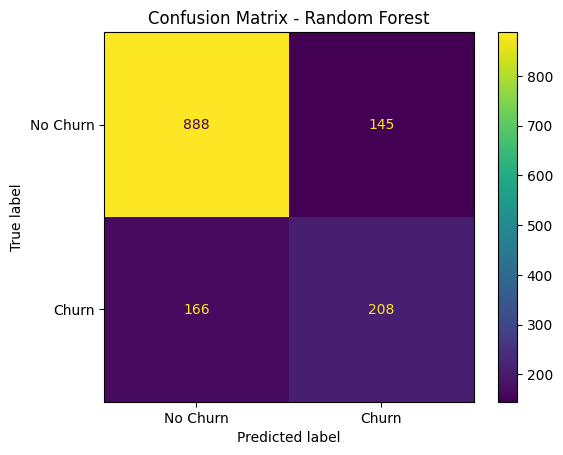

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, display_labels=["No Churn", "Churn"])
plt.title('Confusion Matrix - Random Forest')
plt.show()


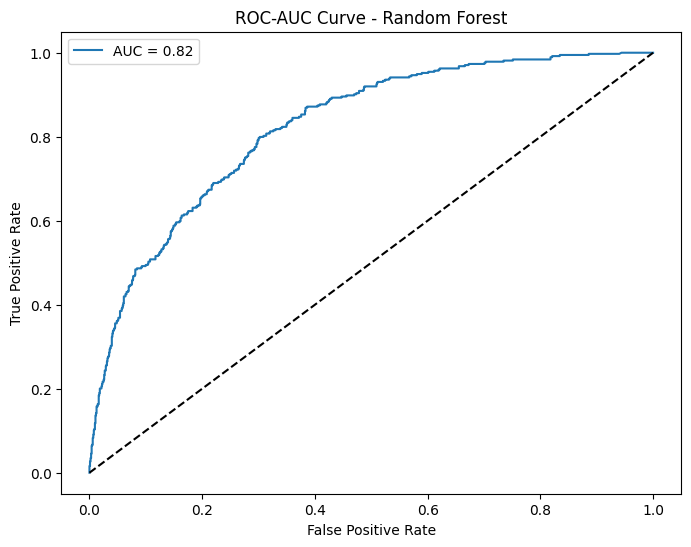

In [33]:
# Predict probabilities
y_probs = best_rf.predict_proba(X_test)[:, 1]  # probabilities for class 1 (churn)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_probs):.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve - Random Forest')
plt.legend()
plt.show()


In [34]:
df['AvgMonthlySpend'] = df['TotalCharges'] / (df['tenure'] + 1)


In [35]:
df['SeniorTechSupport'] = df['SeniorCitizen'] * df['TechSupport']


In [36]:
df['ContractDuration'] = df['Contract'].map({0: 1, 1: 12, 2: 24})


In [37]:
# Create tenure groups
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72],
                           labels=[0, 1, 2, 3, 4])


In [38]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.ensemble import RandomForestClassifier

new_rf_model = RandomForestClassifier(random_state=42)
new_rf_model.fit(X_train, y_train)

# Predict
y_pred_new = new_rf_model.predict(X_test)


In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("New Random Forest Results with Engineered Features:")
print("Accuracy:", accuracy_score(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new))
print(confusion_matrix(y_test, y_pred_new))


New Random Forest Results with Engineered Features:
Accuracy: 0.7889125799573561
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

[[925 108]
 [189 185]]


In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✅ New Random Forest Results with Engineered Features:")
print("Accuracy:", accuracy_score(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_new))


✅ New Random Forest Results with Engineered Features:
Accuracy: 0.7889125799573561
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[925 108]
 [189 185]]


In [43]:
!pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
